In [1]:
# я использую кастомный kernel под virtual environment:
# python -m venv venv
# source venv/bin/activate
# pip install ipykernel
# python -m ipykernel install --user --name=venv
# pip install -r requirements.txt
# jupyter notebook


import warnings
warnings.simplefilter('ignore')

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [60]:
df = pd.read_csv('video_games_sales.csv')

In [61]:
# посмотрим как pandas преобразовал наши исходные данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [62]:
# допустим нас сейчас интересуют следующие столбцы
interesting_columns = ['Name', 'Year_of_Release', 'User_Count', 'Critic_Count']

In [63]:
# хорошая практика посмотреть на данные
df[interesting_columns].head()

,Name,Year_of_Release,User_Count,Critic_Count
0,Wii Sports,2006.0,322.0,51.0
1,Super Mario Bros.,1985.0,NaN,NaN
2,Mario Kart Wii,2008.0,709.0,73.0
3,Wii Sports Resort,2009.0,192.0,73.0
4,Pokemon Red/Pokemon Blue,1996.0,NaN,NaN


In [64]:
# pandas определил тип столбца 'Year_of_Release' как float64 хотя нам понятно, 
# что год должен быть целым числом, поэтому попробуем преобразовать данные:

df['Year_of_Release'] = df.Year_of_Release.astype('int64')

# получаем ошибку, т.к. функция astype не может преобразовать 
# non-finite значения (NA or inf) к целому числу

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [65]:
# нашим ответом бутет избавление от всех строк,
# имеющих пустые значения в одном из столбцов

# заодно посмотрим, сколько строк мы удалим:
lines_before = df.shape[0]
df.dropna(inplace=True)
lines_after = df.shape[0]
print('Очислили данные, строк удалено: ' + str(lines_before - lines_after))

Очислили данные, строк удалено: 9894


In [66]:
# допустим нас интересует продажи игр в разных регионах по годам
# отфильтруем нужные столбцы и посчитаем суммарные продажи по годам:
sales_df = df[[column for column in df.columns if 'Sales' in column] + ['Year_of_Release']]
sales_by_year = sales_df.groupby('Year_of_Release').sum()
sales_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985.0,0.00,0.03,0.00,0.01,0.03
1988.0,0.00,0.02,0.00,0.01,0.03
1992.0,0.02,0.00,0.00,0.00,0.03
1994.0,0.39,0.26,0.53,0.08,1.27
1996.0,7.91,6.88,4.06,1.24,20.10
1997.0,15.34,8.67,9.01,2.02,35.01
1998.0,18.13,12.13,10.81,2.14,43.18
1999.0,23.32,15.69,9.67,2.45,51.17
2000.0,39.34,25.20,11.27,5.49,81.24


<AxesSubplot:xlabel='Year_of_Release'>

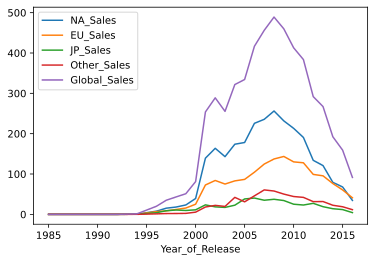

In [67]:
# полученные данные проще анализировать, если представить в виде графика:
sales_by_year.plot()

<AxesSubplot:xlabel='Year_of_Release'>

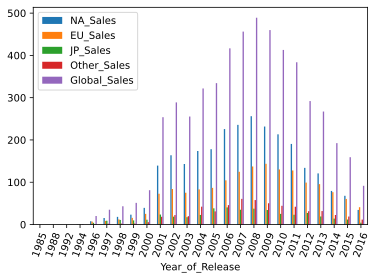

In [56]:
# rot -- обозначает угол наклона подписи по оси абсцисс
sales_by_year.plot(kind='bar', rot=70)

In [58]:
# библиотека seaborn позволяет делать более сложное графическое представление данных
sb_plot = sb.pairplot(df[interesting_columns])


Error in callback <function flush_figures at 0x7fcd0d7d0c10> (for post_execute):


KeyboardInterrupt: 